# Adult (Classification)
## Data Cleaning, Exploration and Wrangling

### Source
- http://archive.ics.uci.edu/ml/datasets/Abalone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
%matplotlib inline

from eda import plot_corr_mat, evaluate_regression, plot_regression

In [2]:
df_tr = pd.read_csv('lake/adult/adult_train.csv')
df_te = pd.read_csv('lake/adult/adult_test.csv')
print(df_tr.shape)
print(df_te.shape)

(32561, 15)
(16281, 15)


In [3]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  >50K<=50K       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Merge Datasets

In [4]:
df_tr['for_training'] = True
df_te['for_training'] = False
df = pd.concat([df_tr, df_te], axis=0).reindex()
df.shape


(48842, 16)

In [6]:
store_csv = False
if store_csv: df.to_csv('lake/adult/adult_full.csv', index=False)

In [7]:
print(df.columns)
df.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       '>50K<=50K', 'for_training'],
      dtype='object')


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,>50K<=50K,for_training
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True


### Types of Features 

In [8]:
# Numerical
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain',
            'capital_loss', 'hours_per_week']
df[num_cols].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Categorical
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                    'native_country', '>50K<=50K']
print(categorical_cols)
df[categorical_cols].describe()

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', '>50K<=50K']


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,>50K<=50K
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [10]:
print("{} Variables are numerical and {} are categorical".format(len(num_cols), len(categorical_cols)))

6 Variables are numerical and 9 are categorical



### Specific Transformations

\> Remove extra leading whitespaces.

In [11]:
# Select all text columns
string_columns = df.loc[:, df.dtypes == np.object].copy()
# Strip all values
df.loc[:, df.dtypes == np.object] = string_columns.applymap(lambda text: text.strip())

In [12]:
df['>50K<=50K'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: >50K<=50K, dtype: int64

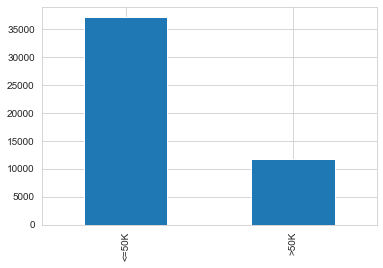

In [13]:
df['>50K<=50K'] = df['>50K<=50K'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
df['>50K<=50K'].value_counts().plot.bar();

\> Create Target Column

In [14]:
df['>50K'] = df['>50K<=50K'].map({'>50K': 1, '<=50K': 0})
df['>50K'].value_counts()

0    37155
1    11687
Name: >50K, dtype: int64

### Missing Values

In [15]:
# Replace '?' with None to identify missing values
df['workclass'] = df['workclass'].replace({'?': None})
df['occupation'] = df['occupation'].replace({'?': None})
df['native_country'] = df['native_country'].replace({'?': None})

empties = df.isna().sum()
pd.DataFrame({'Missing': empties, 'Percentaje': empties/df.shape[0]*100})

,Missing,Percentaje
age,0,0.000000
workclass,2799,5.730724
fnlwgt,0,0.000000
education,0,0.000000
education_num,0,0.000000
marital_status,0,0.000000
occupation,2809,5.751198
relationship,0,0.000000
race,0,0.000000
sex,0,0.000000


TODO: # Capital Gain and Capital Loss has mainly zeros.

### Duplicated Values

In [16]:
dups = df[df.duplicated(keep=False)].sort_values('age')
print(dups.shape)
dups.head(6)

(57, 17)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,>50K<=50K,for_training,>50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K,False,0
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K,False,0
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,True,0
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K,True,0
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,True,0
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K,True,0


In [17]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,>50K<=50K,for_training,>50K


Duplicated records removed.

### Feature Exploration

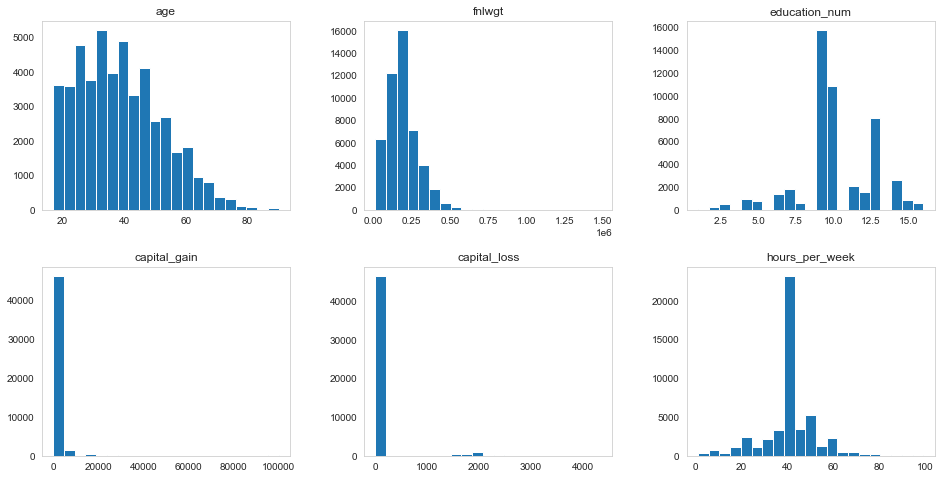

In [18]:
df[num_cols].hist(figsize=(16,8), grid=False, layout=(2, 3), bins = 21);

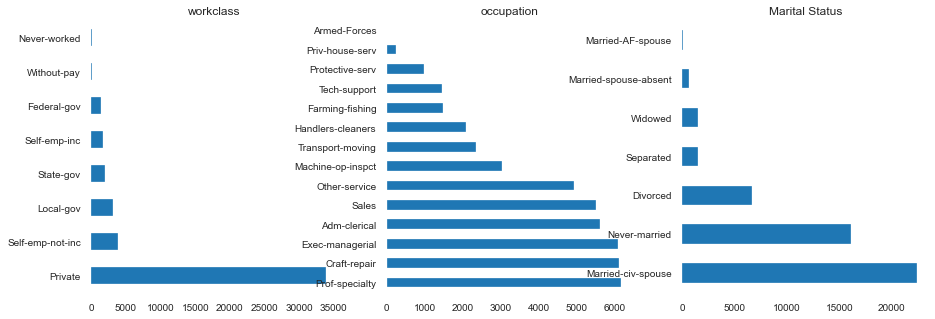

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
df['workclass'].value_counts().plot.barh(ax=ax1, title='Workclass')
df['occupation'].value_counts().plot.barh(ax=ax2, title='Occupation')
df['marital_status'].value_counts().plot.barh(ax=ax3, title='Marital Status');

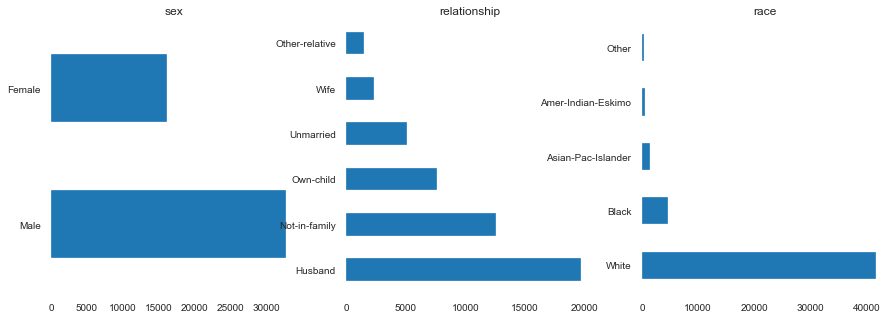

In [41]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
df['sex'].value_counts().plot.barh(ax=ax1, title='Sex')
df['relationship'].value_counts().plot.barh(ax=ax2, title='Relationship')
df['race'].value_counts().plot.barh(ax=ax3, title='Race');

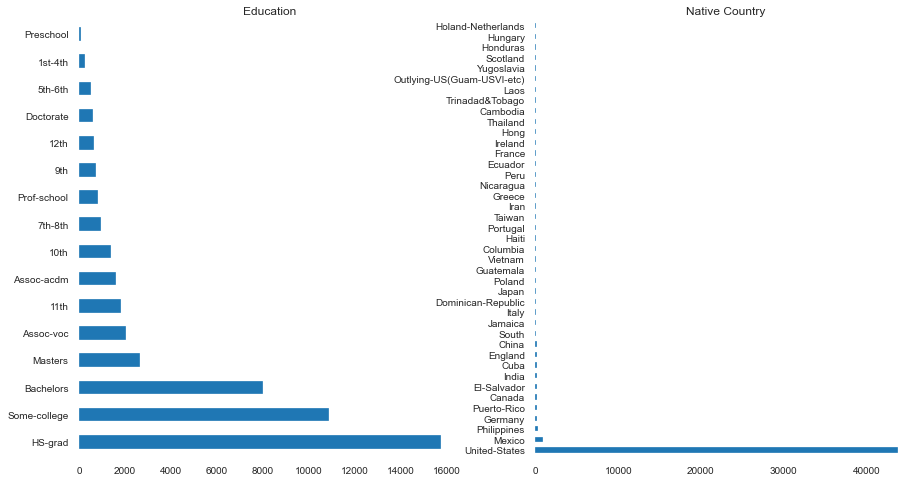

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
df['education'].value_counts().plot.barh(ax=ax1, title='Education')
df['native_country'].value_counts().plot.barh(ax=ax2, title='Native Country');

In [22]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]/Users/delgard/opt/miniconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
Generate report structure: 100%|██████████| 1/1 [00:06<00:00,  6.27s/it]


#### Education and Education Number

In [77]:
# Are these two variables correspondent?
df[['education', 'education_num']].head()

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13


<AxesSubplot:>

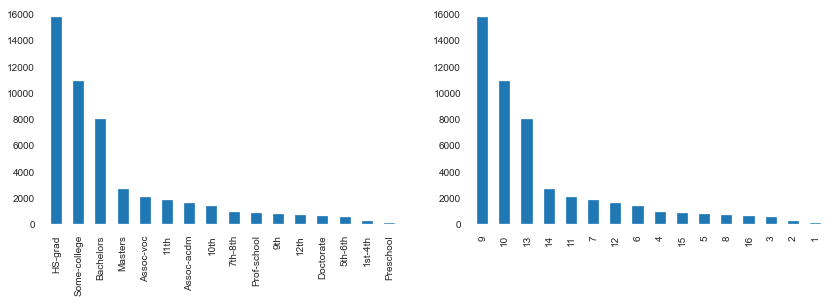

In [49]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(14,4))
df.education.value_counts().plot.bar(ax=ax1)
df.education_num.value_counts().plot.bar(ax=ax2)

In [76]:
# Verifying correspondence
education_to_num = df[['education', 'education_num']].groupby('education').first().to_dict()['education_num']
print(education_to_num)
(df.education.map(education_to_num) == df.education_num).all()

{'10th': 6, '11th': 7, '12th': 8, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, 'Assoc-acdm': 12, 'Assoc-voc': 11, 'Bachelors': 13, 'Doctorate': 16, 'HS-grad': 9, 'Masters': 14, 'Preschool': 1, 'Prof-school': 15, 'Some-college': 10}


True

All values in `education` correspond to `education_num` and viceversa. Therefore, only one will be kept.

### Correlation Analysis

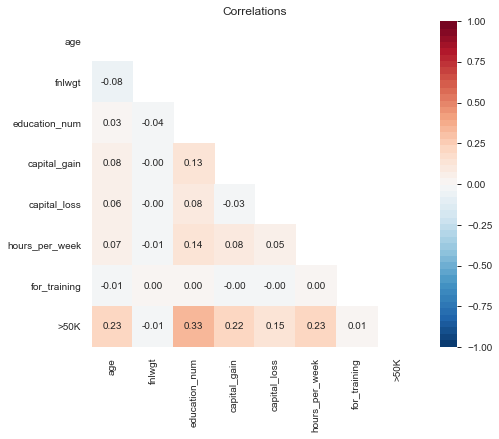

In [23]:
plot_corr_mat(df)

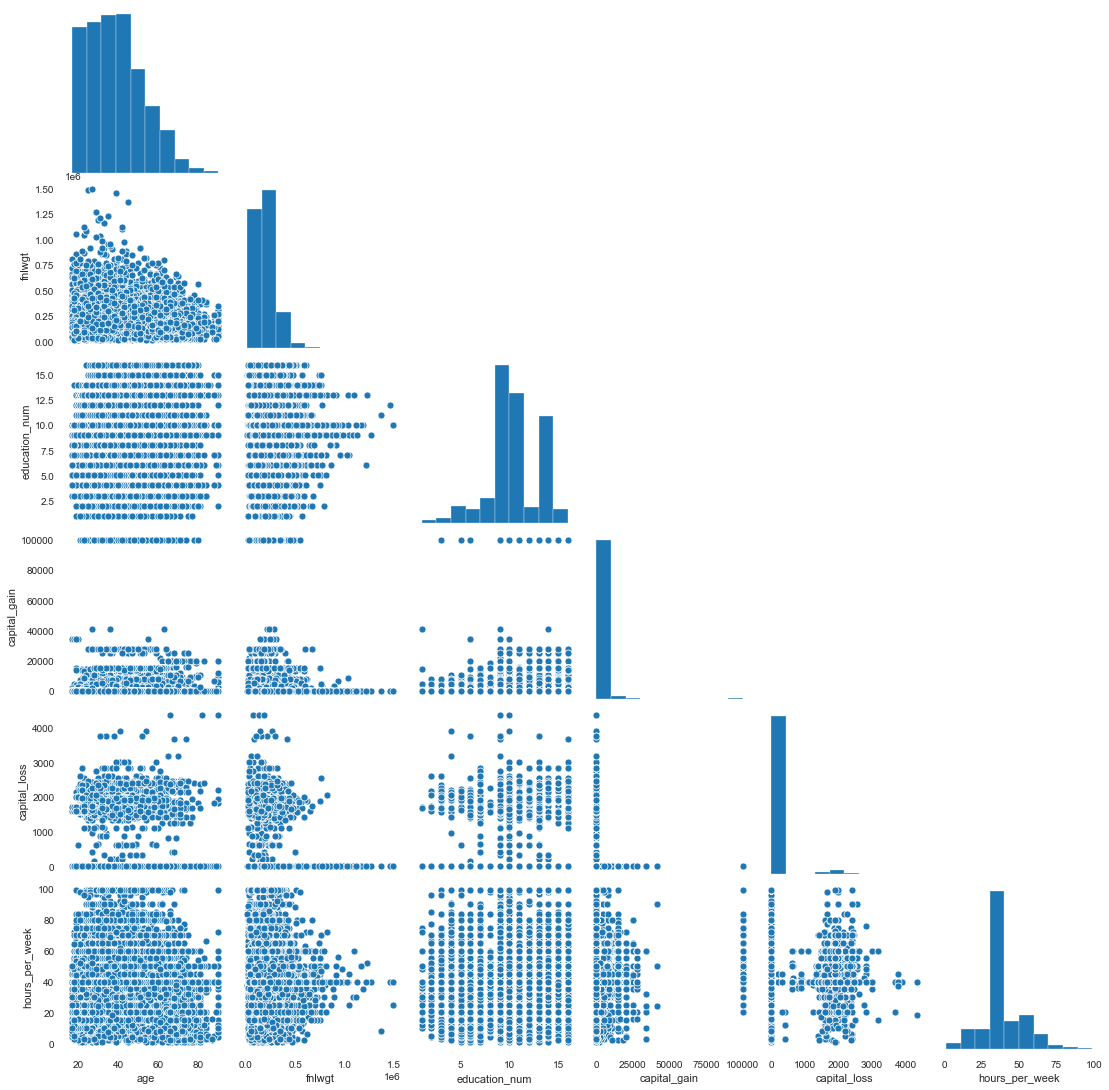

In [78]:
sns.pairplot(df[num_cols], corner=True);

In [ ]:
# Bi-variate Analysis

### Target Analysis

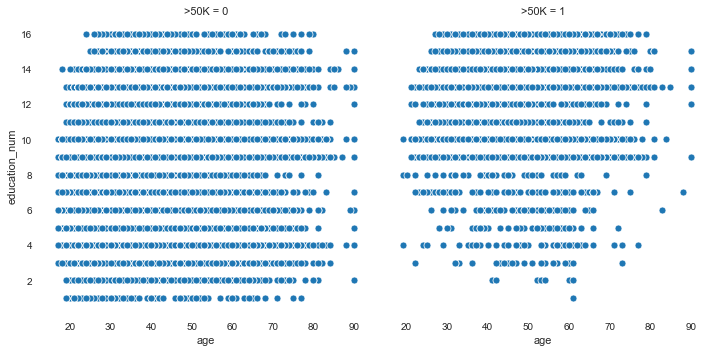

In [25]:
sns.relplot(x="age", y="education_num", col=">50K", kind="scatter", data=df)

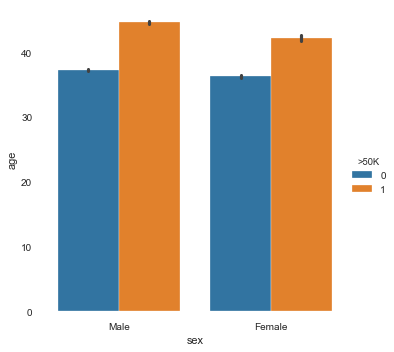

In [26]:
sns.catplot(x="sex", y="age", hue=">50K", kind='bar', data=df)

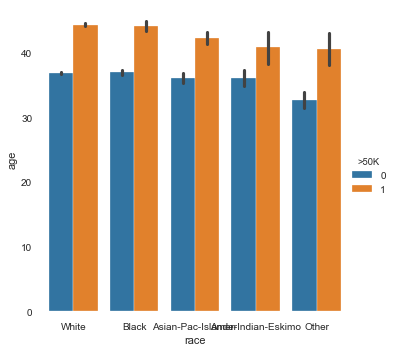

In [27]:
sns.catplot(x="race", y="age", hue=">50K", kind='bar', data=df)

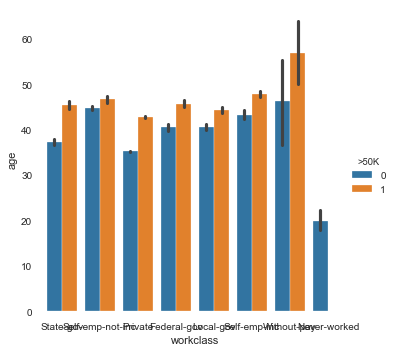

In [28]:
sns.catplot(x="workclass", y="age", hue=">50K", kind='bar', data=df)

## Building Models

In [29]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pd.options.display.float_format = "{:,.6f}".format

In [33]:
features = num_cols
X = df[features]
y = df['>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(36609, 6) (12204, 6)
(12204,) (12204,)


In [34]:
# Raw Features
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
5962,0,0
28379,1,0
8524,1,0
5755,0,0
16085,0,0
...,...,...
499,0,0
22763,0,0
160,0,0
1705,0,0


In [35]:
print("Accuracy: %s%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 79.79351032448378%


In [37]:
print(confusion_matrix(y_test, y_pred))

[[8967  281]
 [2185  771]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9248
           1       0.73      0.26      0.38      2956

    accuracy                           0.80     12204
   macro avg       0.77      0.62      0.63     12204
weighted avg       0.79      0.80      0.76     12204

